In [147]:
# Numpy and Pandas libraries
import numpy as np
import pandas as pd
import sklearn

# Visualization libraries
!pip install squarify
import squarify
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 1. Loading and exploratory analysis of the data


In [148]:
movies = pd.read_csv("https://raw.githubusercontent.com/idoiama/Webinar_DA/master/Ex%201.4.1.%20netflix_titles.csv")

In [149]:
movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [150]:
## add new features in the dataset
movies["date_added"] = pd.to_datetime(movies['date_added'])
movies['year_added'] = movies['date_added'].dt.year
movies['month_added'] = movies['date_added'].dt.month

movies['season_count'] = movies.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
movies['duration'] = movies.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0,
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,9.0,
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,,Kids' TV,"With the help of three human allies, the Autob...",2018.0,9.0,1
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0,9.0,1
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,2017.0,9.0,


In [151]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0,
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,9.0,
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,,Kids' TV,"With the help of three human allies, the Autob...",2018.0,9.0,1
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0,9.0,1
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,2017.0,9.0,


In [152]:
movies.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'season_count'],
      dtype='object')

In [153]:
print(movies.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'season_count'],
      dtype='object')


this is the part of the code that Idoia shared with me


In [154]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6234 non-null   int64         
 1   type          6234 non-null   object        
 2   title         6234 non-null   object        
 3   director      4265 non-null   object        
 4   cast          5664 non-null   object        
 5   country       5758 non-null   object        
 6   date_added    6223 non-null   datetime64[ns]
 7   release_year  6234 non-null   int64         
 8   rating        6224 non-null   object        
 9   duration      6234 non-null   object        
 10  listed_in     6234 non-null   object        
 11  description   6234 non-null   object        
 12  year_added    6223 non-null   float64       
 13  month_added   6223 non-null   float64       
 14  season_count  6234 non-null   object        
dtypes: datetime64[ns](1), float64(2), int6

In [155]:
movies.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
year_added        11
month_added       11
season_count       0
dtype: int64

### Let's drop them!


In [156]:
movies = movies.dropna()

In [157]:
movies.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
season_count    0
dtype: int64

### How many movies do we have? And what about the variables that we are going to use?


In [158]:
movies.shape

(3774, 15)

We have 3774 movies in our dataset.

We can see that 15 variables are describing each movie. How do they look like?

In [95]:
movies.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'season_count'],
      dtype='object')

# 2. Let's ask some questions to the data:


## 2.1. `type`variable. 
**How many types of movies do we have?**

`dataframe ['Name of the variable']. unique()`


In [159]:
movies['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

**And how many movies do we have in each category?**

`dataframe ['Name of the variable']. value_counts()`

In [160]:
movies['type'].value_counts()

Movie      3678
TV Show      96
Name: type, dtype: int64

Let's create some nice plots!

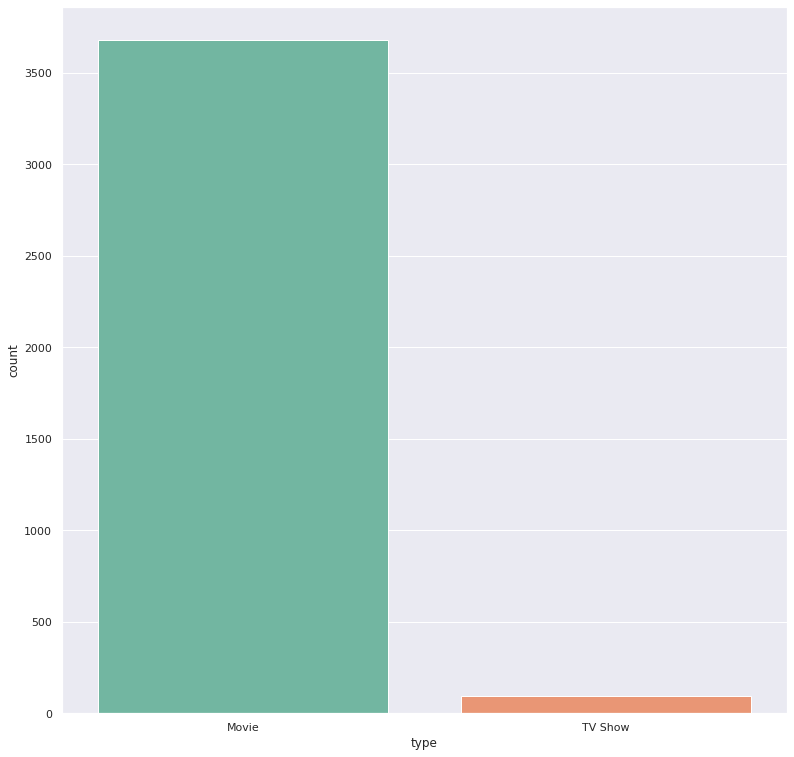

In [161]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=movies, palette="Set2")

**Pie chart**

a) Seaborn library

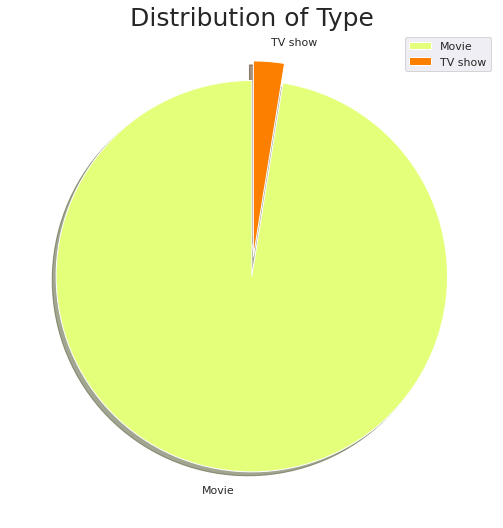

In [162]:
labels = ['Movie', 'TV show']
size = movies['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

b) Plotly library

In [163]:
col = "type"
grouped = movies[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="", height=600, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)


**Question**: What is your opinion about those values? Are they equally distributed? Can you think on any reason why?

(Your answer here)



## 2.2.Which `country` produces the most Contents?


Now it would be nice to compare them by country.

We need to count the countries ( `value_counts()`, do you remember?)


In [164]:
country_data = movies['country']
country_counting = country_data.value_counts()
country_counting

United States                                          1323
India                                                   707
United Kingdom                                          152
Canada                                                   78
Spain                                                    72
                                                       ... 
Belgium, Ireland, Netherlands, Germany, Afghanistan       1
United Kingdom, United States, Russia                     1
Iran, France                                              1
United Kingdom, Australia, Canada, United States          1
France, Belgium, China, United States                     1
Name: country, Length: 433, dtype: int64

In [102]:
tot = sum(country_counting)
top20 = sum(country_counting[:20]) 

print(f'total : {tot}')
print(f'top 20 countries : {top20}')
print(f'percentage : {top20}/{tot} = {100 * top20/tot}')

total : 3774
top 20 countries : 2948
percentage : 2948/3774 = 78.11340752517224


**Let's create a new variable with the top 20 countries**

In [165]:
top20_country = country_counting.head(20)

### Bar & Pie Plots


Bar and pie graphs are the most powerful tool.

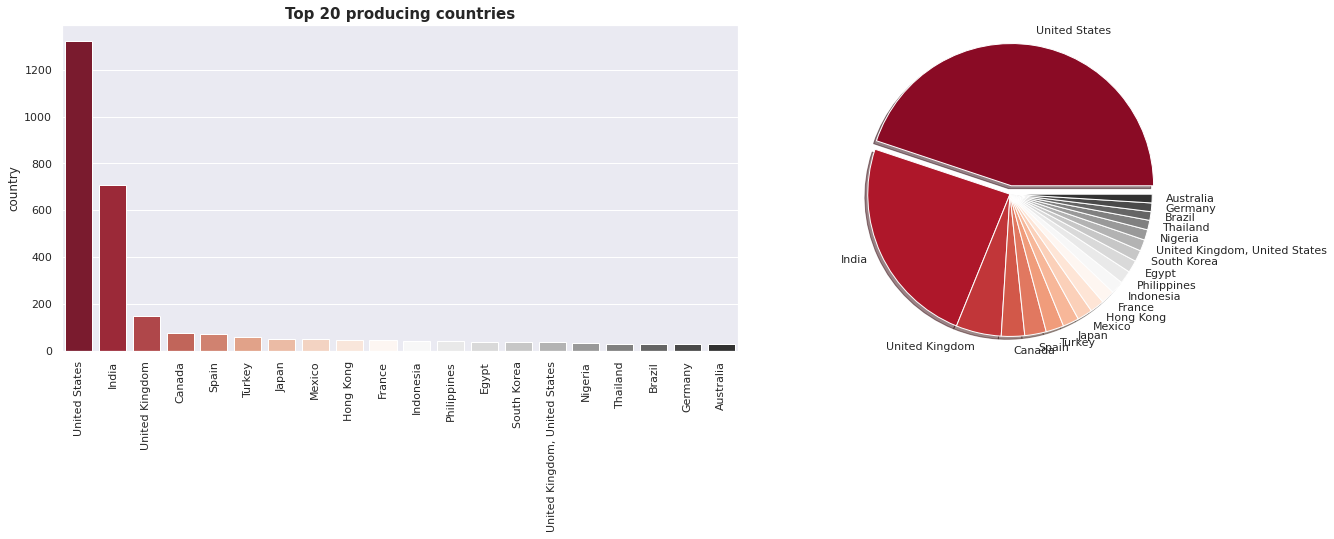

In [166]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2,
                       height_ratios=[6], 
                       width_ratios=[10, 5])

ax = plt.subplot(gs[0])
sns.barplot(top20_country.index, top20_country, ax=ax, palette="RdGy")
ax.set_xticklabels(top20_country.index, rotation='90')
ax.set_title('Top 20 producing countries', fontsize=15, fontweight='bold')

explode = [0 for _ in range(20)]
explode[0] = 0.06

ax2 = plt.subplot(gs[1])
ax2.pie(top20_country, labels=top20_country.index,
        shadow=True, startangle=0, explode=explode,
        colors = sns.color_palette("RdGy", n_colors=20)
       )
ax2.axis('equal') 

plt.show()

**Question2.** What do you think about those plots?  Which one do you think it represents the `top20`countries?


(Type your answer here: )


##### **Exercise 1.** Have a look at this [link](https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/) and choose the color palette that you prefer.

Once you've choose your favourite one, copy the above function and modify the items:

*   sns.barplot(top20_country.index, bottom20_country, ax=ax, **palette="YlGn"**)
*  colors = **sns.color_palette("YlGn"**, n_colors=20)

**... and what about the ones in the bottom?**

Let's repeat the procedure!

1. Create a new variable with the information that we want to show: `bottom20_country`

In [167]:
bottom20_country = country_counting.tail(20)

In [168]:
bottom20_country

United Kingdom, Egypt, United States                   1
United States, Spain, Germany                          1
United States, United Kingdom, Canada, Japan           1
Germany, United States, United Kingdom, Canada         1
Colombia, Mexico                                       1
Cambodia                                               1
Romania, Bulgaria, Hungary                             1
United States, Canada, France                          1
Portugal, France, Poland, United States                1
Sweden, Netherlands                                    1
United Arab Emirates, United States, United Kingdom    1
United Kingdom, United States, Morocco                 1
Singapore, United States                               1
United Kingdom, Germany, United States                 1
Poland, West Germany                                   1
Belgium, Ireland, Netherlands, Germany, Afghanistan    1
United Kingdom, United States, Russia                  1
Iran, France                   

2. Let' create the bar and pie plots!

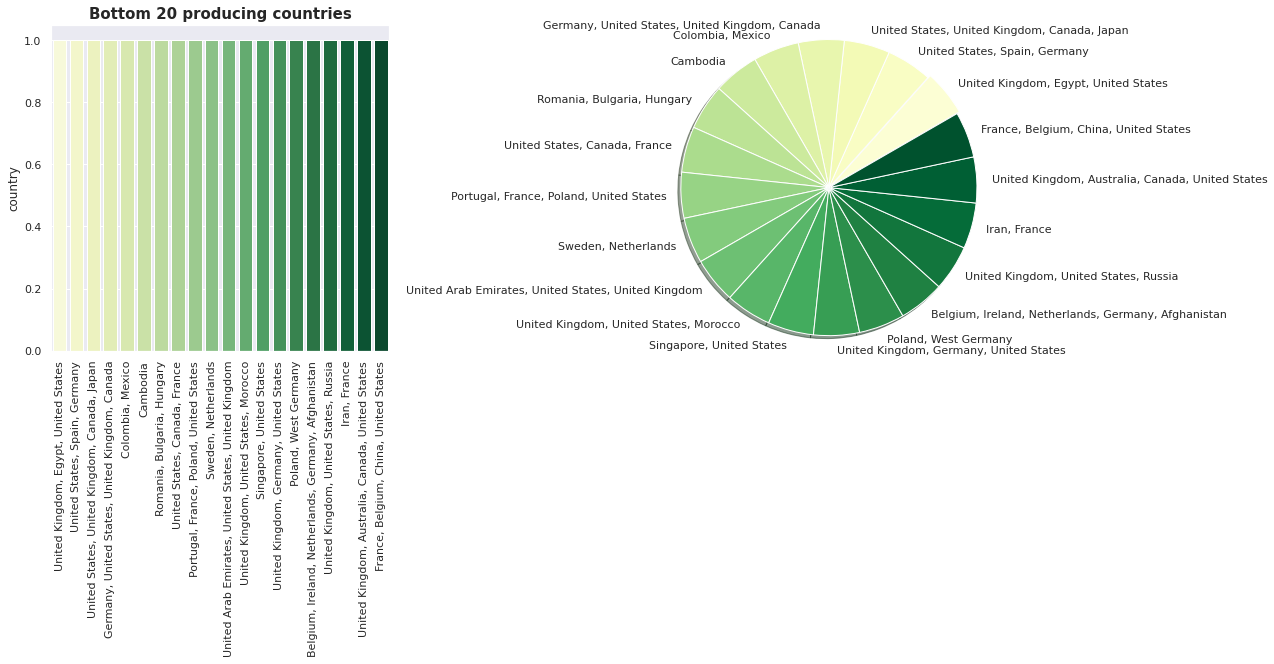

In [169]:
fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2,
                       height_ratios=[6], 
                       width_ratios=[10, 20])

ax = plt.subplot(gs[0])
sns.barplot(bottom20_country.index, bottom20_country, ax=ax, palette="YlGn")
ax.set_xticklabels(bottom20_country.index, rotation='90')
ax.set_title('Bottom 20 producing countries', fontsize=15, fontweight='bold')

explode = [0 for _ in range(20)]
explode[0] = 0.02

ax2 = plt.subplot(gs[1])
ax2.pie(bottom20_country, labels=bottom20_country.index,
        shadow=True, startangle=30, explode=explode,
        colors = sns.color_palette("YlGn", n_colors=20)
       )
ax2.axis('equal') 

plt.show()

### Let's create an interactive Bar plot with the same information

In [170]:
# Let's select the top20_countries 

top20_country

United States                    1323
India                             707
United Kingdom                    152
Canada                             78
Spain                              72
Turkey                             60
Japan                              54
Mexico                             51
Hong Kong                          48
France                             46
Indonesia                          43
Philippines                        43
Egypt                              41
South Korea                        38
United Kingdom, United States      38
Nigeria                            35
Thailand                           32
Brazil                             29
Germany                            29
Australia                          29
Name: country, dtype: int64

In [171]:
labels = top20_country.index
values = top20_country
trace1 = go.Bar(y=labels, x=values, orientation="h", name="", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Countries with most content", height=700, legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

### TreeMap | Waffle (Mosaic plot)

One of the visualization algorithms from the 1990s. While mosaic plots are among the most basic tiling algorithms, there are no visualizations based on python.

`Treemaps` are better suited for structural tree data, but they can also be used for large comparisons.

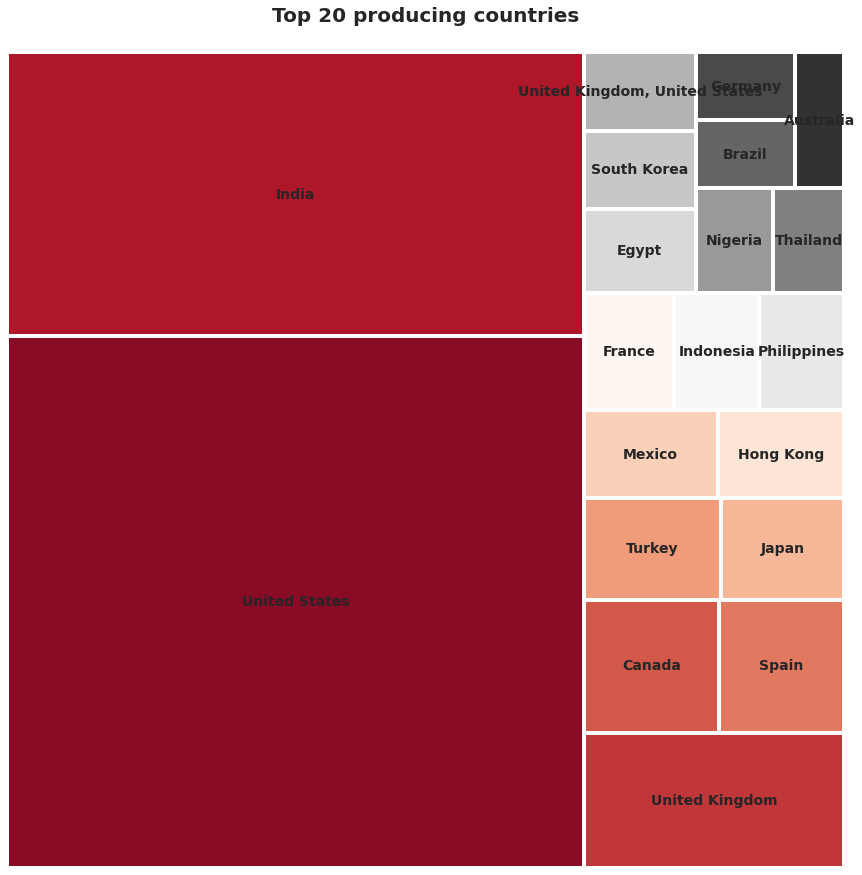

In [172]:
y = top20_country
fig = plt.figure(figsize=(15, 15))
squarify.plot(sizes = y.values, label = y.index, color=sns.color_palette("RdGy", n_colors=20),
             linewidth=4, text_kwargs={'fontsize':14, 'fontweight' : 'bold'})
plt.title('Top 20 producing countries', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.axis('off')
plt.show()

Clearly, the **United States** is the beginning, and as a content powerhouse, it accounts for 40% of the top 20.

**India** is at the top of the list as wella.


Probably, if you draw a rough graph of country population, you'll get a more meaningful graph.



#### **Exercise 2.**  Can you perform the same plot by taking into account the ones in the bottom? `bottom20_country`

## 2.3. How much content has been created over years?

We are going to analyse the variable : `year_added`

**Let's create two variables, linked to the two categories that we have in `type`variable**

### Scatter plot

In [173]:
all_tvshow = movies[movies["type"] == "TV Show"]
all_movie = movies[movies["type"] == "Movie"]

In [174]:
col = "year_added"

vc1 = all_tvshow[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)


%matplotlib inline
trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [175]:
vc2 = all_movie[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))

data = [trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

**Question3.** Why do you think the content has decreased in 2020? 

In [114]:
#(Your answer here)

### Barplot

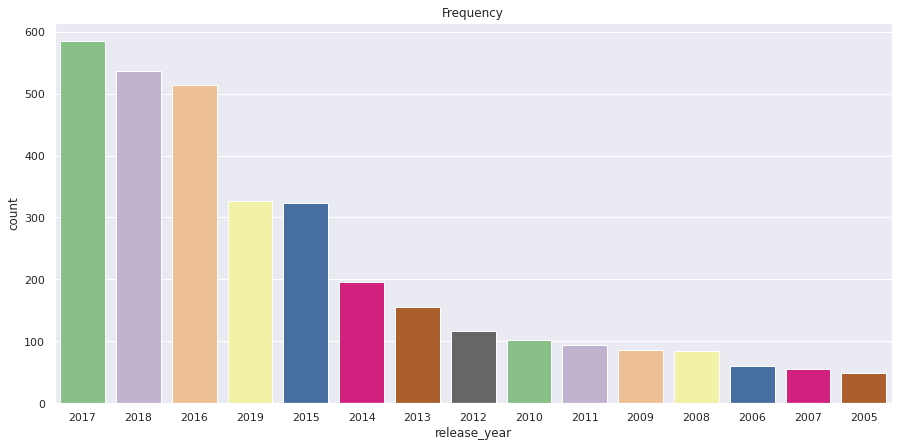

In [176]:
plt.figure(1, figsize=(15, 7))
plt.title("Frequency")
sns.countplot(x = "release_year",
              order=movies['release_year'].value_counts().index[0:15] ,
              data=movies,palette='Accent')

#### **Exercise 3** Can you create the same plot independently for type = `Movie`and type = `TVShow`?

In [116]:
all_tvshow = movies[movies["type"] == "TV Show"]
all_movie = movies[movies["type"] == "Movie"]

## 2.4. Let's analyse the variable `listed_in`

This variable contains the genere in which each of the movies / TV Show belongs to. Let's first have a look at the possible categories that this variable has:

`dataset['variable'].unique()`


### All items in my dataset

In [177]:
movies['listed_in'].unique()

array(['Children & Family Movies, Comedies', 'Comedies',
       'International Movies, Sci-Fi & Fantasy, Thrillers',
       'Stand-Up Comedy', 'Action & Adventure, Thrillers',
       'Action & Adventure, Dramas, International Movies',
       'Cult Movies, Dramas, Independent Movies',
       'Comedies, Independent Movies, Romantic Movies',
       'Action & Adventure, Comedies, International Movies',
       'Horror Movies, Thrillers', 'Dramas, Independent Movies',
       'Dramas, Independent Movies, Romantic Movies',
       'Horror Movies, International Movies',
       'Children & Family Movies, Comedies, Sci-Fi & Fantasy',
       'Comedies, Romantic Movies',
       'Dramas, International Movies, Thrillers',
       'Dramas, Independent Movies, International Movies',
       'Comedies, International Movies',
       'Action & Adventure, Comedies, Independent Movies',
       'Comedies, Dramas, International Movies', 'Documentaries',
       'Comedies, International Movies, Romantic Movies',
 

In [178]:
movies['listed_in'].value_counts()

Dramas, International Movies                                 237
Stand-Up Comedy                                              234
Dramas, Independent Movies, International Movies             184
Comedies, Dramas, International Movies                       168
Documentaries                                                136
                                                            ... 
Children & Family Movies, Dramas, Music & Musicals             1
Documentaries, Faith & Spirituality, International Movies      1
Anime Features, Romantic Movies                                1
Action & Adventure, Sports Movies                              1
Classic Movies, Dramas, Music & Musicals                       1
Name: listed_in, Length: 296, dtype: int64

In [179]:
# Let's create our variable--> convert everything into a list
movies_listed = list(set(movies['listed_in']))
movies_listed

['Cult Movies, Dramas, Thrillers',
 'Children & Family Movies, Comedies, Sports Movies',
 'Action & Adventure, Comedies, International Movies',
 'Children & Family Movies, Documentaries',
 'British TV Shows, International TV Shows, TV Action & Adventure',
 'Comedies, Dramas, LGBTQ Movies',
 'Dramas, Sports Movies',
 'Children & Family Movies, Comedies, Faith & Spirituality',
 'Children & Family Movies, Comedies, Sci-Fi & Fantasy',
 'Dramas, Faith & Spirituality, International Movies',
 'International Movies, Romantic Movies, Sci-Fi & Fantasy',
 'Action & Adventure, Cult Movies',
 'Classic Movies, Dramas, Independent Movies',
 'Action & Adventure, Comedies, Dramas',
 'Action & Adventure, Children & Family Movies, Sci-Fi & Fantasy',
 'Children & Family Movies, Documentaries, Sports Movies',
 'Comedies, Cult Movies, Dramas',
 'Classic & Cult TV, TV Action & Adventure, TV Horror',
 'Documentaries, International Movies, LGBTQ Movies',
 'Crime TV Shows, International TV Shows, Korean TV Show

In [180]:
movies_listed = ", ".join(movies['listed_in']).split(", ")
movies_listed

['Children & Family Movies',
 'Comedies',
 'Comedies',
 'International Movies',
 'Sci-Fi & Fantasy',
 'Thrillers',
 'Stand-Up Comedy',
 'Action & Adventure',
 'Thrillers',
 'Action & Adventure',
 'Dramas',
 'International Movies',
 'Cult Movies',
 'Dramas',
 'Independent Movies',
 'Comedies',
 'Independent Movies',
 'Romantic Movies',
 'Action & Adventure',
 'Comedies',
 'International Movies',
 'Horror Movies',
 'Thrillers',
 'Dramas',
 'Independent Movies',
 'Dramas',
 'Independent Movies',
 'Romantic Movies',
 'Horror Movies',
 'International Movies',
 'Children & Family Movies',
 'Comedies',
 'Sci-Fi & Fantasy',
 'Comedies',
 'Romantic Movies',
 'Dramas',
 'International Movies',
 'Thrillers',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'Dramas',
 'International Movies',
 'Thrillers',
 'Comedies',
 'International Movies',
 'Action & Adventure',
 'Comedies',
 'Independent Movies',
 'Comedies',
 'Dramas',
 'International Movies',
 'Dramas',
 'Independent Movies',
 'Do

#### Bar plot

We need to prepare the data

In [181]:
from collections import Counter
col = "listed_in"
categories = movies_listed
counter_list = Counter(categories).most_common(50)

In [182]:
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]

trace1 = go.Bar(y=labels, x=values, orientation="h", name="Movie")
data = [trace1]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

#### Wordclouds


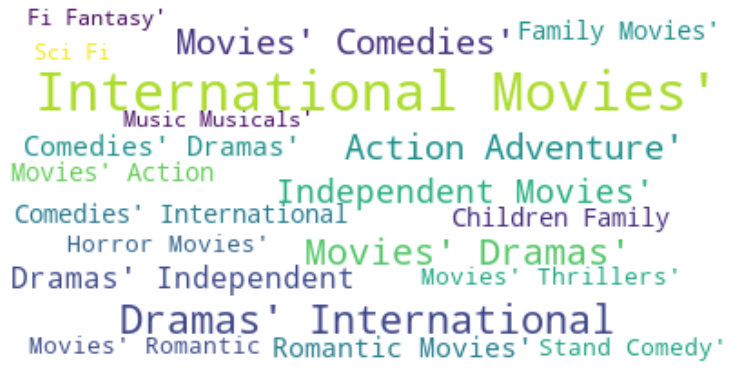

In [183]:
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size=50, max_words=20,background_color="white").generate(str(movies_listed))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

#### **Exercise 4** Can you create a new Wordcloud plot by using the variable `top20_country`


(Your answer goes there)


**This Wordcloud represents the most frequent items / words in our dataset. Do you think they will be different in function of the `type`of items? Remember TV Show and movie**

### TV-Show

In [184]:
d1 = movies[movies["type"] == "TV Show"]
d1 = ", ".join(d1['listed_in']).split(", ")

#### Bar plot

In [185]:
col = "listed_in"
categories = d1
counter_list = Counter(categories).most_common(50)

In [186]:
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]

trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV-Show", marker=dict(color="coral"))
data = [trace1]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

#### Wordclouds

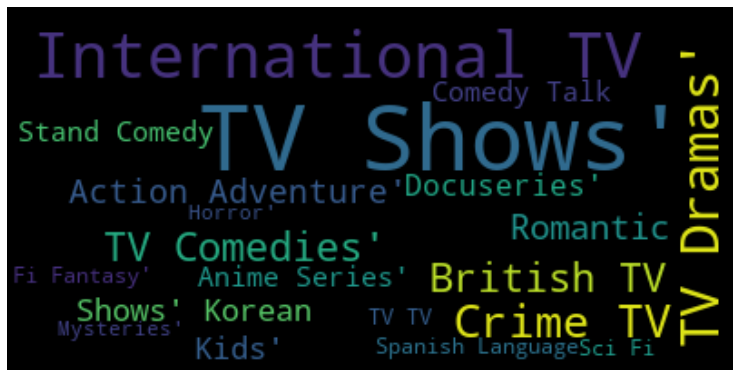

In [187]:
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size=50, max_words=20,background_color="black").generate(str(d1))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

### Movies


In [128]:
d2 = movies[movies["type"] == "Movie"]
d2 = ", ".join(d2['listed_in']).split(", ")
d2 = list(set(d2))

In [129]:
d2

['Sports Movies',
 'Romantic Movies',
 'Classic Movies',
 'Action & Adventure',
 'International Movies',
 'Independent Movies',
 'Horror Movies',
 'Comedies',
 'Sci-Fi & Fantasy',
 'LGBTQ Movies',
 'Faith & Spirituality',
 'Anime Features',
 'Thrillers',
 'Dramas',
 'Music & Musicals',
 'Movies',
 'Children & Family Movies',
 'Documentaries',
 'Stand-Up Comedy',
 'Cult Movies']

#### Bar plot


In [188]:
col = "listed_in"
categories = d2
counter_list = Counter(categories).most_common(50)

In [189]:
counter_list

[('Sports Movies', 1),
 ('Romantic Movies', 1),
 ('Classic Movies', 1),
 ('Action & Adventure', 1),
 ('International Movies', 1),
 ('Independent Movies', 1),
 ('Horror Movies', 1),
 ('Comedies', 1),
 ('Sci-Fi & Fantasy', 1),
 ('LGBTQ Movies', 1),
 ('Faith & Spirituality', 1),
 ('Anime Features', 1),
 ('Thrillers', 1),
 ('Dramas', 1),
 ('Music & Musicals', 1),
 ('Movies', 1),
 ('Children & Family Movies', 1),
 ('Documentaries', 1),
 ('Stand-Up Comedy', 1),
 ('Cult Movies', 1)]

In [132]:
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]

trace1 = go.Bar(y=labels, x=values, orientation="h", name="Movie", marker=dict(color="green"))
data = [trace1]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

#### Wordclouds

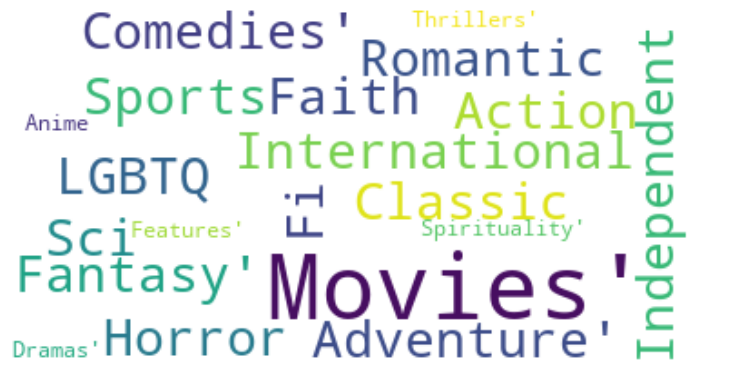

In [133]:
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size=50, max_words=20,background_color="white").generate(str(d2))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

#### **Exercise 5.** Can you create a Wordcloud but with the `title` variable? The data is already prepared below:

`titles_movies`


In [134]:
titles_movies = movies
titles_movies = ", ".join(titles_movies['title']).split(", ")
titles_movies = list(set(titles_movies))

In [135]:
#(Your answer here)

## 2.6. Which are the directors with more movies?

In that case, we are going to analyse the variable `director`, but first we need to subset only the items in which `type` = Movies

In [190]:
all_movie = movies[movies["type"] == "Movie"]

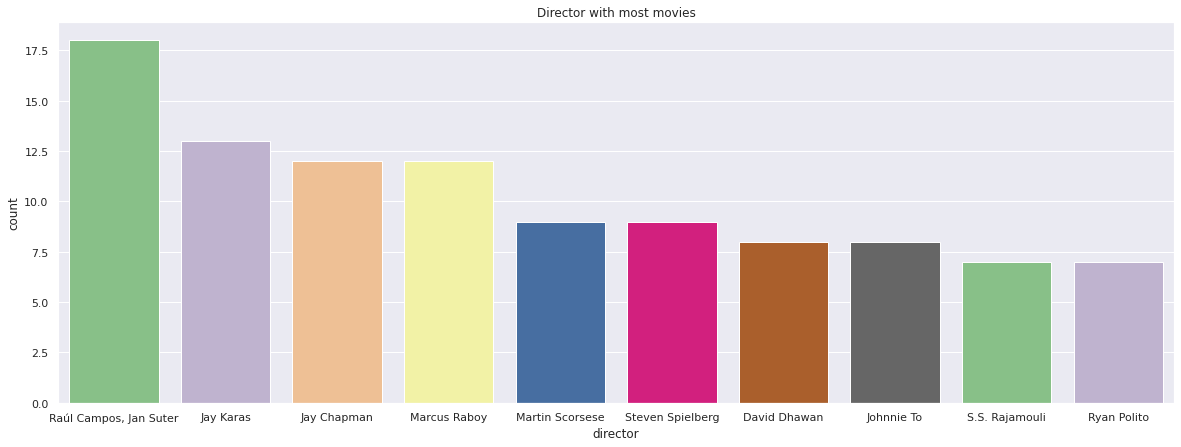

In [191]:
plt.figure(1, figsize=(20, 7))
plt.title("Director with most movies")
sns.countplot(x = "director", order=all_movie['director'].value_counts().index[0:10] ,
              data=all_movie,palette='Accent')

## 2.7 .. and what about the TV shows?

In [138]:
all_tvshow = movies[movies["type"] == "TV Show"]

In [139]:
all_tvshow['director'].value_counts()

Alastair Fothergill    3
Stan Lathan            2
Shin Won-ho            2
Iginio Straffi         2
Rob Seidenglanz        2
                      ..
Ian Barber             1
Daniel Kontur          1
Dheeraj Berry          1
Tsutomu Mizushima      1
Mark Tonderai          1
Name: director, Length: 90, dtype: int64

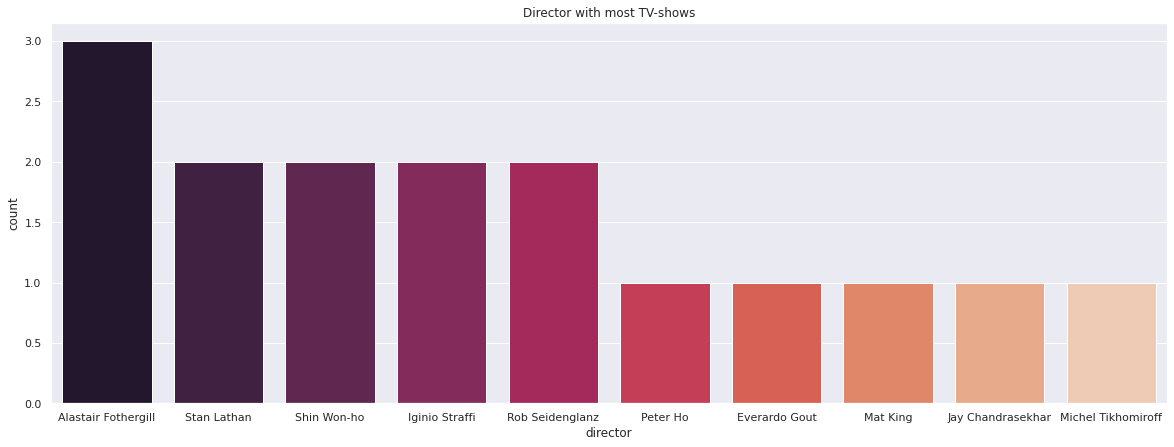

In [140]:
plt.figure(1, figsize=(20, 7))

plt.title("Director with most TV-shows")
sns.countplot(x = "director", order=all_tvshow['director'].value_counts().index[0:10] ,
              data=all_tvshow,palette='rocket')

## 2.8 Which is the TV-Show that has the max number of seasons?

In that case we are going to have a look at the variable `season_count`

In [141]:
movies.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0,
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,2017.0,9.0,


In [142]:
all_tvshow = movies[movies["type"] == "TV Show"]

In [143]:
# Let's arrange the data

col = 'season_count'
vc1 = all_tvshow[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})

vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values('count', ascending = False)

In [144]:
trace1 = go.Bar(x= all_tvshow.title, y=vc1["count"], name="TV Shows", marker=dict(color="mediumturquoise"))
data = [trace1]

layout = go.Layout(title="Seasons", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

## 2.9 .. and last but not least

-- let' s create a map to see the total number of items added per year and country



In [192]:
# First, create our new variable

year_country2 = movies.groupby('year_added')['country'].value_counts().reset_index(name='counts')

In [193]:
fig = px.choropleth(year_country2, locations="country", color="counts", 
                    locationmode='country names',
                    animation_frame='year_added',
                    range_color=[0,20],
                    color_continuous_scale=px.colors.sequential.OrRd
                   )

fig.update_layout(title='Comparison by country')
fig.show()